In [1]:
# User Inputs
dir_name = r'C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\Sprint 5\1usrstory_reference_identify'
base_filename = 'CMS1500_FrasierClean.png'
config_filename = 'CMS1500_config_USI.json'

In [2]:
# Setting up by importing all the relevant libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import misc
import json
from pprint import pprint
import io
import base64

In [3]:
# Loading the CMS1500 Form in the form of an array
img_form = cv2.imread(os.path.join(dir_name, base_filename))
img_form_gray = cv2.cvtColor(img_form,cv2.COLOR_BGR2GRAY)
img_form_gray = cv2.GaussianBlur(img_form_gray,(5,5),0)

In [4]:
img_form_gray.shape

(3300, 2550)

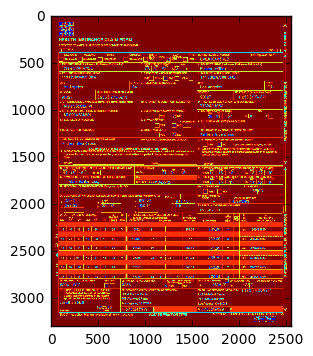

(<matplotlib.image.AxesImage at 0x1d057f846d8>, None)

In [5]:
plt.imshow(img_form_gray), plt.show()

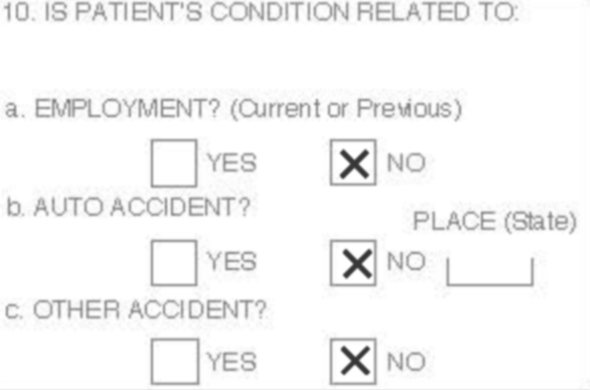

In [10]:
misc.toimage(img_form_gray[910:1300, 950:1540])

In [5]:
with open(os.path.join(dir_name, config_filename)) as data_file:
    dict_config_in = json.load(data_file)

In [6]:
# pprint(dict_config_in)

In [7]:
# lst_encode = []
for key in dict_config_in.keys():
    x1 = x2 = y1 = y2 = 0.0
    x1 = dict_config_in[key]["coordinates"]["x1"]
    x2 = dict_config_in[key]["coordinates"]["x2"]
    if dict_config_in[key]["type"] == "txt":
        y1 = dict_config_in[key]["coordinates"]["y1"] - (dict_config_in[key]["coordinates"]["y2"] - dict_config_in[key]["coordinates"]["y1"])
        y2 = dict_config_in[key]["coordinates"]["y1"]
    if dict_config_in[key]["type"] == 'omr':
        y1 = dict_config_in[key]["coordinates"]["y1"]
        y2 = dict_config_in[key]["coordinates"]["y2"]
    if dict_config_in[key]["type"] == 'tbl':
        y1 = dict_config_in[key]["coordinates"]["y1"] - (100)
        y2 = dict_config_in[key]["coordinates"]["y1"]

    ref_marker = misc.toimage(img_form_gray[y1:y2,x1:x2])
    in_mem_file = io.BytesIO()
    ref_marker.save(in_mem_file, format = "PNG")
    in_mem_file.seek(0)
    img_bytes = in_mem_file.read()
    ref_marker_encoded = base64.b64encode(img_bytes)

    if dict_config_in[key]["type"] == 'tbl':
        y1_ = dict_config_in[key]["coordinates"]["y2"]
        y2_ = dict_config_in[key]["coordinates"]["y2"] + (100)
        ref_marker = misc.toimage(img_form_gray[y1_:y2_,x1:x2])
        in_mem_file = io.BytesIO()
        ref_marker.save(in_mem_file, format = "PNG")
        in_mem_file.seek(0)
        img_bytes = in_mem_file.read()
        ref_marker_encoded_ = base64.b64encode(img_bytes)
    else:
        ref_marker_encoded_ = ""
    dict_config_in[key]["ref1"] = ref_marker_encoded
    dict_config_in[key]["ref2"] = ref_marker_encoded_
    del dict_config_in[key]["coordinates"]

In [8]:
with open(os.path.join(dir_name, config_filename.replace(".json","") + "_ref.json"), 'w') as fp:
    json.dump(dict_config_in, fp)